<a href="https://colab.research.google.com/github/JeicieSugui/it-cert-automation-practice/blob/master/DATASCI__Data_Collection_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Automating ETL Pipelining with Python and SQLite3 for API Data

## Setup API and Request Token

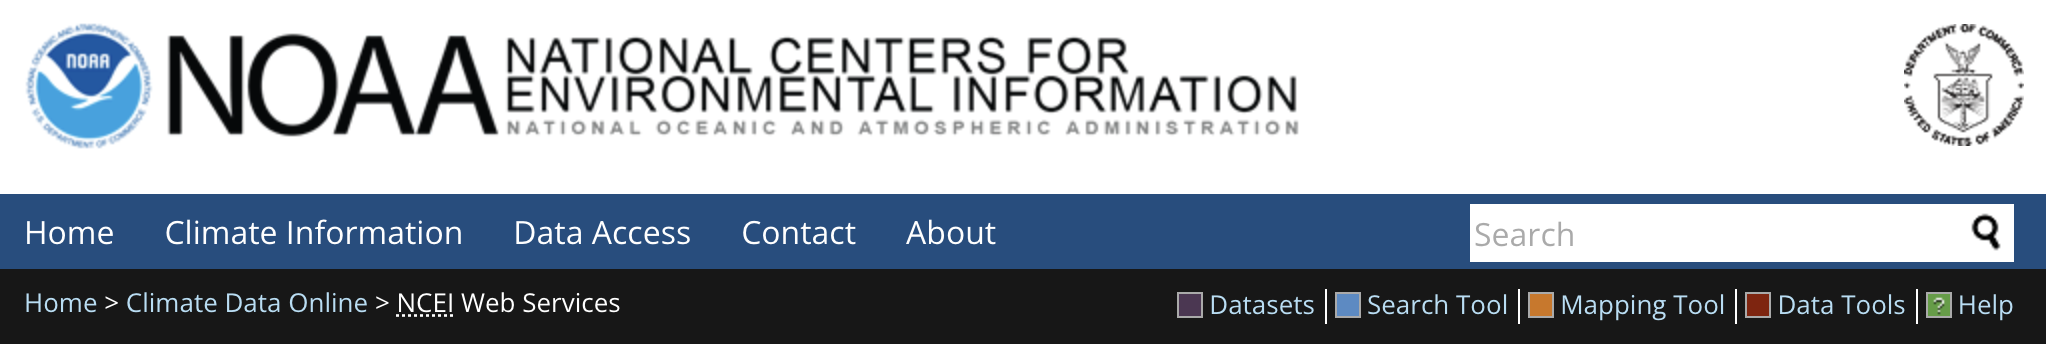

NCDC's Climate Data Online (CDO) offers web services that provide access to current data. This API is for developers looking to create their own scripts or programs that use the CDO database of weather and climate data. An access token is required to use the API, and each token will be limited to five requests per second and 10,000 requests per day.

**Request token**

In order to access the CDO web services a token must first be obtained from the [token request page](https://www.ncdc.noaa.gov/cdo-web/token).



**Check if your token works**

In [2]:
import requests

def make_request(endpoint, payload=None):

  return requests.get(
      f'https://www.ncei.noaa.gov/cdo-web/api/v2/{endpoint}',
      headers={
          'token':'MEmZzWPmaqhAZYiGVMAUVpOkIzDazVsR' # Replace with your token
      },
      params=payload
  )

In [3]:
response = make_request('datasets')
response.status_code

200

### Status Code Details

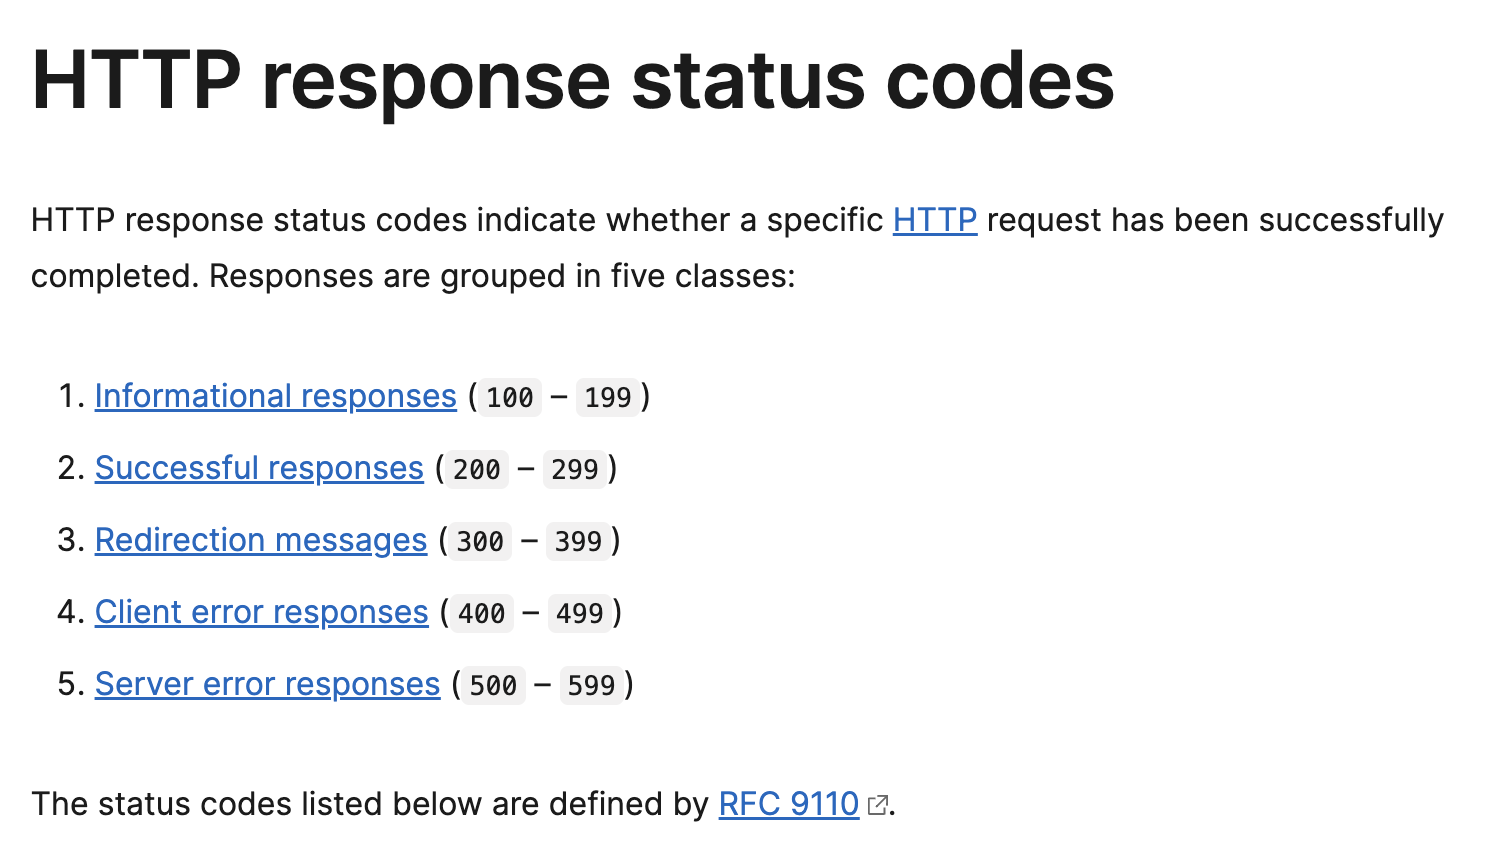

https://developer.mozilla.org/en-US/docs/Web/HTTP/Status

If you got a `status_code` of `200` then you're good to go!

## Setup Database

We'll create a SQLite3 database to store the extracted climate data.

In [1]:
import sqlite3

# Create or connect to SQLite3 database
conn = sqlite3.connect('climate_data.db')
cur = conn.cursor()

# Create a table to store the climate data
cur.execute('''CREATE TABLE IF NOT EXISTS climate_data (
                date TEXT,
                datatype TEXT,
                station TEXT,
                value REAL,
                attributes TEXT
            )''')

conn.commit()

Before we make API calls, configure the base URL and API token for authentication.

In [4]:
import requests

# NOAA API Base URL
base_url = "https://www.ncdc.noaa.gov/cdo-web/api/v2/data"

# Your NOAA API token
headers = {
    'token': 'MEmZzWPmaqhAZYiGVMAUVpOkIzDazVsR'  # Replace with your actual token
}

Now, we’ll extract climate data (for example, temperature or precipitation data) from the NOAA API.

In [5]:
def extract_climate_data(datasetid, start_date, end_date, stationid, datatypeid, limit=1000):
    params = {
        'datasetid': datasetid,
        'startdate': start_date,
        'enddate': end_date,
        'stationid': stationid,
        'datatypeid': datatypeid,
        'limit': limit
    }

    response = requests.get(base_url, headers=headers, params=params)

    if response.status_code == 200:
        return response.json().get('results', [])
    else:
        print(f"Error: {response.status_code}, {response.text}")
        return []


Here’s how we can extract climate data for a specific station and time period.

In [6]:
dataset_id = "GHCND"  # Global Historical Climatology Network Daily
start_date = "2023-01-01"
end_date = "2023-01-31"
station_id = "GHCND:USW00094728"  # Example station ID
datatype_id = "TMIN"  # Minimum Temperature

data = extract_climate_data(dataset_id, start_date, end_date, station_id, datatype_id)

# Sample data output
for entry in data:
    print(entry)

{'date': '2023-01-01T00:00:00', 'datatype': 'TMIN', 'station': 'GHCND:USW00094728', 'attributes': ',,W,2400', 'value': 94}
{'date': '2023-01-02T00:00:00', 'datatype': 'TMIN', 'station': 'GHCND:USW00094728', 'attributes': ',,W,2400', 'value': 94}
{'date': '2023-01-03T00:00:00', 'datatype': 'TMIN', 'station': 'GHCND:USW00094728', 'attributes': ',,W,2400', 'value': 83}
{'date': '2023-01-04T00:00:00', 'datatype': 'TMIN', 'station': 'GHCND:USW00094728', 'attributes': ',,W,2400', 'value': 94}
{'date': '2023-01-05T00:00:00', 'datatype': 'TMIN', 'station': 'GHCND:USW00094728', 'attributes': ',,W,2400', 'value': 67}
{'date': '2023-01-06T00:00:00', 'datatype': 'TMIN', 'station': 'GHCND:USW00094728', 'attributes': ',,W,2400', 'value': 39}
{'date': '2023-01-07T00:00:00', 'datatype': 'TMIN', 'station': 'GHCND:USW00094728', 'attributes': ',,W,2400', 'value': 28}
{'date': '2023-01-08T00:00:00', 'datatype': 'TMIN', 'station': 'GHCND:USW00094728', 'attributes': ',,W,2400', 'value': 6}
{'date': '2023-01

Once the data is extracted, we may need to clean or transform it. For example, converting temperature from tenths of a degree Celsius to degrees.

In [ ]:
def transform_data(data):
    transformed_data = []

    for entry in data:
        # Convert temperature to degrees (from tenths)
        if entry['datatype'] == 'TMIN' or entry['datatype'] == 'TMAX':
            entry['value'] = entry['value'] / 10.0

        transformed_data.append(entry)

    return transformed_data

transformed_data = transform_data(data)

In [ ]:
transformed_data

[{'date': '2023-01-01T00:00:00',
  'datatype': 'TMIN',
  'station': 'GHCND:USW00094728',
  'attributes': ',,W,2400',
  'value': 9.4},
 {'date': '2023-01-02T00:00:00',
  'datatype': 'TMIN',
  'station': 'GHCND:USW00094728',
  'attributes': ',,W,2400',
  'value': 9.4},
 {'date': '2023-01-03T00:00:00',
  'datatype': 'TMIN',
  'station': 'GHCND:USW00094728',
  'attributes': ',,W,2400',
  'value': 8.3},
 {'date': '2023-01-04T00:00:00',
  'datatype': 'TMIN',
  'station': 'GHCND:USW00094728',
  'attributes': ',,W,2400',
  'value': 9.4},
 {'date': '2023-01-05T00:00:00',
  'datatype': 'TMIN',
  'station': 'GHCND:USW00094728',
  'attributes': ',,W,2400',
  'value': 6.7},
 {'date': '2023-01-06T00:00:00',
  'datatype': 'TMIN',
  'station': 'GHCND:USW00094728',
  'attributes': ',,W,2400',
  'value': 3.9},
 {'date': '2023-01-07T00:00:00',
  'datatype': 'TMIN',
  'station': 'GHCND:USW00094728',
  'attributes': ',,W,2400',
  'value': 2.8},
 {'date': '2023-01-08T00:00:00',
  'datatype': 'TMIN',
  'stat

Next, we'll load the transformed data into the SQLite3 database.

In [ ]:
def load_data_to_sqlite(transformed_data):
    for entry in transformed_data:
        cur.execute('''INSERT INTO climate_data (date, datatype, station, value, attributes)
                       VALUES (?, ?, ?, ?, ?)''',
                    (entry['date'], entry['datatype'], entry['station'], entry['value'], entry['attributes']))

    conn.commit()

load_data_to_sqlite(transformed_data)

Finally, you can query the SQLite3 database to verify that the data has been loaded correctly.


In [ ]:
def query_data():
    cur.execute('SELECT * FROM climate_data LIMIT 10')
    rows = cur.fetchall()

    for row in rows:
        print(row)

query_data()

('2023-01-01T00:00:00', 'TMIN', 'GHCND:USW00094728', 9.4, ',,W,2400')
('2023-01-02T00:00:00', 'TMIN', 'GHCND:USW00094728', 9.4, ',,W,2400')
('2023-01-03T00:00:00', 'TMIN', 'GHCND:USW00094728', 8.3, ',,W,2400')
('2023-01-04T00:00:00', 'TMIN', 'GHCND:USW00094728', 9.4, ',,W,2400')
('2023-01-05T00:00:00', 'TMIN', 'GHCND:USW00094728', 6.7, ',,W,2400')
('2023-01-06T00:00:00', 'TMIN', 'GHCND:USW00094728', 3.9, ',,W,2400')
('2023-01-07T00:00:00', 'TMIN', 'GHCND:USW00094728', 2.8, ',,W,2400')
('2023-01-08T00:00:00', 'TMIN', 'GHCND:USW00094728', 0.6, ',,W,2400')
('2023-01-09T00:00:00', 'TMIN', 'GHCND:USW00094728', 2.8, ',,W,2400')
('2023-01-10T00:00:00', 'TMIN', 'GHCND:USW00094728', 3.3, ',,W,2400')


In [ ]:
cur.close()
conn.close()

## Automate the ETL Process

We can combine the above steps into a single function that performs the entire ETL process automatically.

In [ ]:
# Connect to the database first

In [ ]:
def automate_etl(datasetid, start_date, end_date, stationid, datatypeid):
    # Extract
    raw_data = extract_climate_data(datasetid, start_date, end_date, stationid, datatypeid)

    # Transform
    transformed_data = transform_data(raw_data)

    # Load
    load_data_to_sqlite(transformed_data)

    print(f"ETL Process completed for {stationid} from {start_date} to {end_date}")

# Run the ETL process for January 2023 data
automate_etl("GHCND", "2023-01-01", "2023-01-31", "GHCND:USW00094728", "TMIN")


In [ ]:
# Close the connection to the database

# Using Automated EDA Tools

We will extract the data from the SQLite3 database, create a Pandas DataFrame, and then perform automated Exploratory Data Analysis (EDA), you can use libraries like pandas, sqlite3, and automated EDA tools like pandas_profiling or sweetviz.

In [ ]:
import sqlite3
import pandas as pd

# Connect to the SQLite3 database
conn = sqlite3.connect('climate_data.db')

# Query the data from the database
query = "SELECT * FROM climate_data"
df = pd.read_sql(query, conn)

# Close the connection
conn.close()

# Display the first few rows of the dataframe
print(df.head())


                  date datatype            station  value attributes
0  2023-01-01T00:00:00     TMIN  GHCND:USW00094728    9.4   ,,W,2400
1  2023-01-02T00:00:00     TMIN  GHCND:USW00094728    9.4   ,,W,2400
2  2023-01-03T00:00:00     TMIN  GHCND:USW00094728    8.3   ,,W,2400
3  2023-01-04T00:00:00     TMIN  GHCND:USW00094728    9.4   ,,W,2400
4  2023-01-05T00:00:00     TMIN  GHCND:USW00094728    6.7   ,,W,2400


This will load all the data from the climate_data table into a Pandas DataFrame.

## Automated EDA using Pandas Profiling

We will use pandas_profiling (or the newer ydata-profiling) for automated EDA. First, install the library if you haven't:

In [ ]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.0/390.0 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 80.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=f62cea333f9a8c5688923dcf01899b92f42d73b6d19a541593769c90bcb1d095
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


Now let's generate an EDA report:

In [ ]:
from ydata_profiling import ProfileReport

# Create a profiling report
profile = ProfileReport(df, title="Climate Data Profiling Report")

# Export to an HTML file
profile.to_file("climate_data_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

This will create an HTML report with various statistics, visualizations, and insights about the dataset, including correlations, missing values, distributions, etc.

## Automated EDA using Sweetviz

In [ ]:
!pip install sweetviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 54.5 MB/s eta 0:00:00


This will be used in the next example.

# Activity 1: Banking Data

In [ ]:
import pandas as pd

df = pd.read_csv('/content/bank-full.csv', sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
import sweetviz as sv

# Generate a Sweetviz report
report = sv.analyze(df)

# Export to an HTML file
report.show_html("banking_viz_report.html")

                                             |          | [  0%]   00:00 -> (? left)

Report banking_viz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Your turn, use pandas profiling to generate visualizations for this data.

In [ ]:
# Your code here

## Activity 2: Beer Sales Data

In [ ]:
# Use panda profiling

In [ ]:
# Use sweetviz

Write your comparison of the outputs here.

Write your recommendations here.